Stationary stochastic processes,<br>
Lund University, <br>
Centre for Mathematical Sciences HT 2024, <br>
Mathematical Statistics

# Computer exercise 2 (Ladok-Lab 2a)

In this computer exercise you will study the connections between
pole-zero plots, covariance functions, spectral densities and
realizations for some AR-, MA- and ARMA-processes and you will also
learn how to simulate data from a specific model. You will study
recorded speech data and reconstruct the data sequence from white noise and an estimated AR-model.
***
* Please work in groups of two students!
***

In [1]:
!sudo apt-get install libportaudio2
!pip install sounddevice
!wget https://raw.githubusercontent.com/axellangenskiold/fmsf10/refs/heads/main/help_funcs_SSP.py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (247 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126435 fil

In [2]:
# Start with the necessary imports
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal
import scipy.io as sio
from scipy.fft import fft, ifft
import sounddevice as sd

from help_funcs_SSP import poles_and_zeros, plot_poles_and_zeros, arcov, completeAR
print("hello")


hello


## 1 Working with AR-, MA- and ARMA-models

To use the powerful toolbox of AR-, MA- and ARMA-models, it is important to understand how these models are designed and the properties that are connected to a specific model. The design of a specific model for a certain problem is built on your knowledge of advantages and drawbacks of the model.

### 1.1 Modelling and simulation of AR(1)-processes

Create an AR(1)-model in Python, representing `C=np.array([1])` and `A=np.array([1,a1])` for
your choice of the real-valued parameter `a1` with the stability
restriction `|a1|<1`. In this exercise you will write code for your own
script to generate a set of figures of the pole-zero plot, covariance
function, spectral density and a realization example of a specific
model. Use the `plt.subplot`-command to collect all representations in the
same figure. With the function `poles_and_zeros(C,A)` poles and zeros are found and plotted. Change the value of `a1` to another
value with opposite sign and study the pole location.

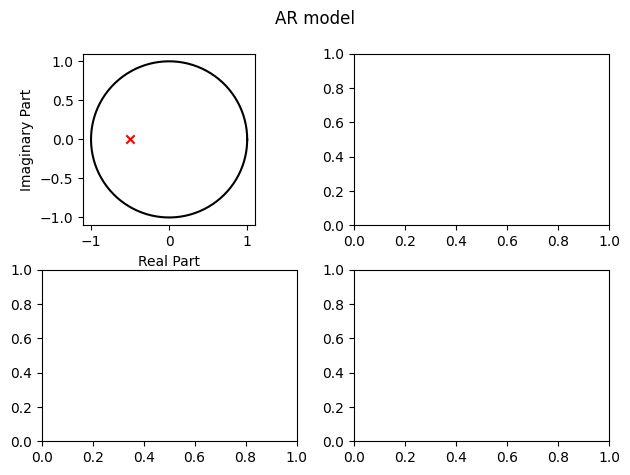

In [3]:
# Write your own code below
a1 = 0.5

C = np.array([1])
A = np.array([1, a1])

# Calculate poles (and zeros)
n,p = poles_and_zeros(C,A)
# Plotting, use subplots
fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])




***Q1. Does the resulting locations of the pole match your choices of
**`a1`** according to theory (see Ex. 7.1, page 170 in the course
book)?***

**A1.** Yes, a1 results in (-a1, 0) for R, I in the unit circle.

With a choice of the input white noise standard deviation $\sigma$, the
corresponding spectral density can be calculated. The spectral density can then be visualized in the frequency range zero to 0.5.
The function `scipy.signal.freqz()` calculates the frequency function corresponding to the given polynomials `sigma*C` and `A` for angular frequencies
$0\leq \omega < 2\pi$. We choose to divide the angular frequency scale with $2\pi$ and plot the spectral density as a function of frequencies
$0\leq f \leq 0.5$.

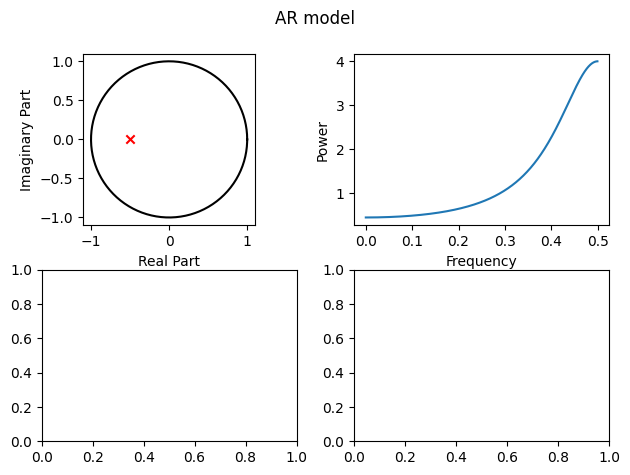

In [4]:
# Write your own code below
sigma = 1

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,R)
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power")
fig

The true covariance function is found and depicted with the inverse Fourier of the spectral density function. Note: For correct calculation of the true covariance function, the frequency range must be the whole spectral density (see above) with the frequency range zero to one (zero to $2\pi$). Then the inverse Fourier transform `ifft` will compute the true real valued covariance function.

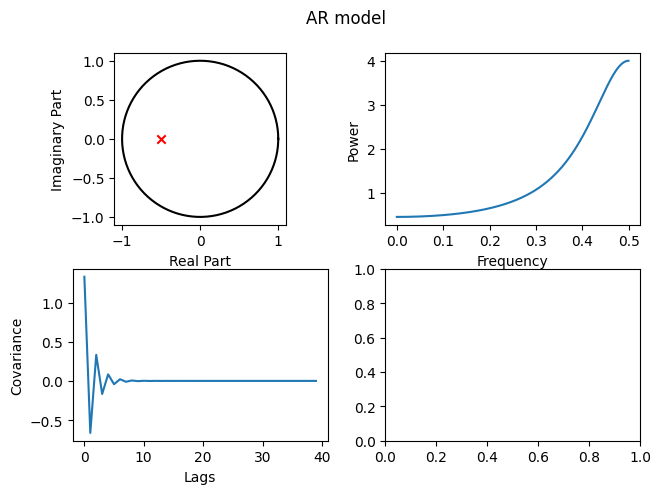

In [5]:
# Calculate the incerse Fourier transform of the spectral density
r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")
fig

Study the spectral density and covariance function for a positive and
negative choice of the parameter `a1`, `|a1|<1`.

***Q2. Do the spectral densities and the covariance functions look as
expected for your choices of positive and negative parameter `a1`?***

**A2.** Yes, oscillates for a1 > 0 and stabilizes for a1 < 0.


To simulate a realization of a Gaussian AR-process, we generate a
sequence of independent and Gaussian distributed stochastic variables,
$e_t, t=1, \ldots, n$ with mean zero and variance $\sigma^2$ and use
this sequence as input of our model,

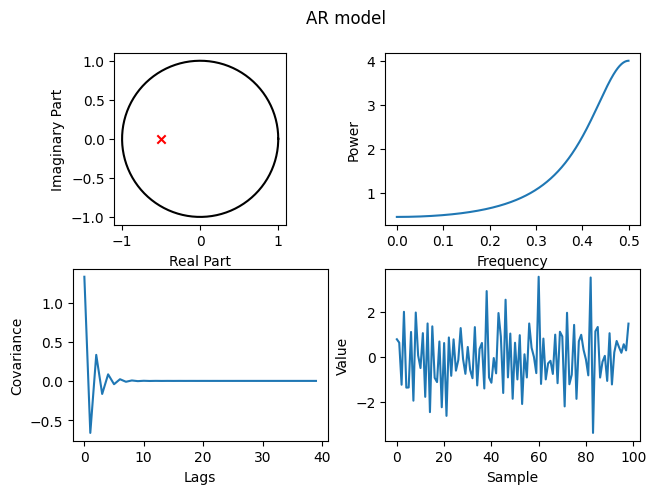

In [6]:
n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")
fig


The plotted realization is a column vector `xstat`, which represents the
stationary part of the filtered white noise. In some cases, the initial
samples are not representative of a stationary process realization. The
exact number of samples depends on how quickly the impulse response
parameters reach zero. If you run the above lines of code once again, a
new realization is simulated. Include the code for simulating and
plotting a realization in your script and verify that all four subplots
seem to be correct for a positive and negative value of `a1`.


Finally, run the script for two parameters, $|a^{stable}_1|<1$, which
gives a stationary process realization, and
$a^{unstable}_1=|1/a^{stable}_1|>1$, which will result in an unstable
realization. Verify that the spectral densities and covariance functions
have exactly the same shapes (except for a scaling factor) for the two
cases.

***Q3. Can you prove that the two spectral densities will have the same
shape (except for a scaling factor)?***

**A3.**
$$
S_{1/a}(\omega)
= \frac{{\sigma'}^{2}}{1 + a^{-2} + 2a^{-1}\cos\omega}
= \frac{{\sigma'}^{2}a^{2}}{1 + a^{2} + 2a\cos\omega}
= \left(\frac{{\sigma'}^{2}a^{2}}{\sigma^{2}}\right) S_a(\omega).
$$



It is important to note that stability cannot be verified just by
visualizing the spectral density or the covariance function. A check
that the poles are inside the unit circle should always be performed!

### 1.2 Properties of an AR-model

Copy the code designed above, but with a model change to an AR(2)-process, making a choice of poles

    p=[rhoa*np.exp(1j*2*np.pi*freqa) , rhoa*np.exp(-1j*2*np.pi*freqa)]

where `1j` is $\sqrt{-1}$, predefined in Python. Make a choice of the
damping factor `rhoa<1` and frequency `0<freqa<0.5`. Note that there
always should be a complex conjugate pair of the poles, when we work
with real valued processes, except when the poles are located on the
real axis which we can express just with a real value `-1 < real_p < 1`. The polynomial `A` (and similarly `C`) are found with `np.poly(p)`.

Text(313.26767676767673, 0.5, 'Value')

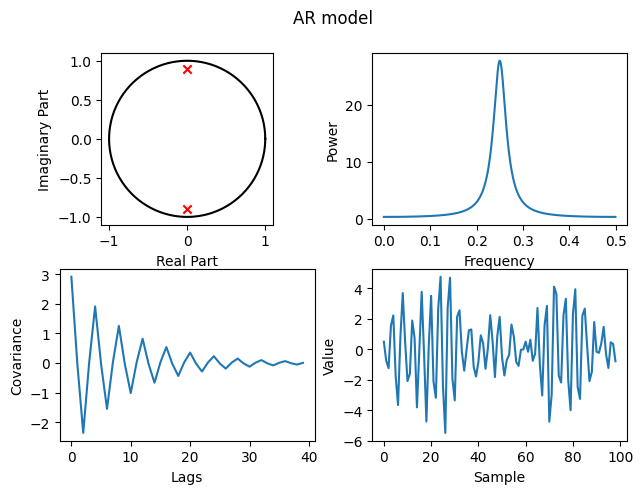

In [7]:
# Write your own code here
rhoa = 0.9
freqa = 0.25

p=[rhoa*np.exp(1j*2*np.pi*freqa) , rhoa*np.exp(-1j*2*np.pi*freqa)]


# Convert zeros and poles to polynomials C, A
C = [1]
A = np.poly(p)

# Plotting the 4 plots
# Using previously given snippets, write your own code below:
n,p = poles_and_zeros(C,A)
# Plotting, use subplots
fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])


sigma = 1

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,R)
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power")


r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")


n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")

Always check that the resulting polynomial coefficients are real valued!
(Sometimes small imaginary error values could appear. Then you should
take the real part of your polynomial coefficients, with the function
`np.real()`.) For an AR-model all zeros are in the origin, i.e. `C=np.array([1])`. Change
the damping parameter `rhoa` and study the resulting plots.

***Q4. How do the covariance function, spectral density and realization
change when you increase the value of the damping factor to be closer to
one?***

**A4.**

For large `rhoa`:
- Clear peak at frequency `freqa`
- Covariance function is more defined

For small `rhoa`:
- Coviariance function drops to `zero` almost imediatly.

<br></br>

Change the frequency parameter `freqa` and study the plots.

***Q5. How do the covariance function, spectral density and realization
change when you increase the angle of your poles from the positive real
axis?***

**A5.** For `freqa` = 0.25, the spectral density is symmetrical and peaks at `freqa`. For `freqa` < 0.25, the spectral density is high for low frequencies, and for `freqa` > 0.25, the spectral density is high for high frequencies.


By building up larger sets of complex-conjugated pairs of poles you can
model AR-processes of higher order, e.g. and AR(4)-process,

Text(313.26767676767673, 0.5, 'Value')

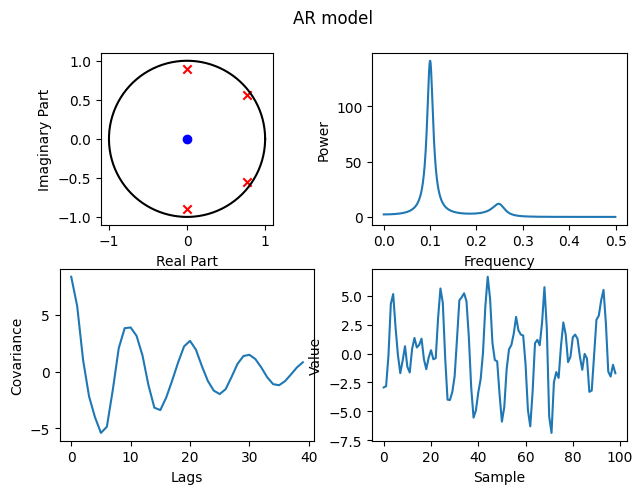

In [8]:
# Define parameters
# Write your own code below
rho1, freq1 = 0.95, 0.1
rho2, freq2 = 0.9,  0.25

# Define multiple pole-pairs and find the corresponding polynomial.
p1 = [rho1*np.exp(1j*2*np.pi*freq1),  rho1*np.exp(-1j*2*np.pi*freq1)]
p2 = [rho2*np.exp(1j*2*np.pi*freq2), rho2*np.exp(-1j*2*np.pi*freq2)]
p = p1+p2
n = [0]
A = np.poly(p)
C = np.poly(n)

# Plotting the 4 plots
# Using previously given snippets, write your own code below:

n,p = poles_and_zeros(C,A)

fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,R)
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power")


r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")


n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")

### 1.3 Properties of an MA-model

Now you should change your modelling to an MA-process. Start with an
MA(2)-model with `A=np.array([1])` (all poles in the origin) and your choices of `rhoc` and
`freqc`. Remember the restrictions from your previous choices of poles!
Change the parameters and study the resulting plots.


Text(313.26767676767673, 0.5, 'Value')

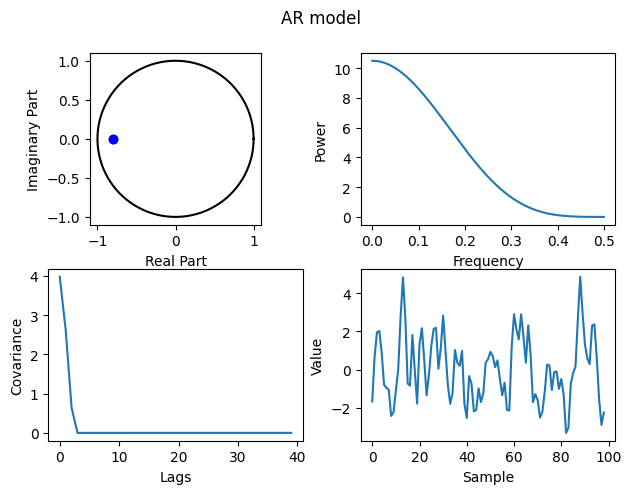

In [9]:
# Define parameters
freqc = 0.5
rhoc = 0.8

# Define multiple zero-pairs and find the corresponding polynomial.
C = np.poly([rhoc*np.exp(1j*2*np.pi*freqc),  rhoc*np.exp(-1j*2*np.pi*freqc)])
A = [1]
n,p = poles_and_zeros(C,A)

# Plotting the 4 plots
# Write your own code below
fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,R)
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power")


r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")


n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")

***Q6. How do the covariance function, spectral density and realization
change when you increase the angle of your zeros from the positive real
axis and the distance from the origin?***

**A6.**

When the distance from the origin increases, the spectral density increases.

When the angle from the real axis increases, the spectral density dips at the frequency value (`freqc`). It has a symmetrical "dip" at 90 degrees, and is mirrored for values `k` and `1-k` for `freqc`.

When the angle is 90 degrees, the covariance function doesn't go below zero.
When the angle is 180 degrees, the covariance function doesn't go below zero as well.

Add more zeros into your process, e.g. an MA(3)-process is easily
generated by adding a real-valued zero `-1<realzero<1`,

Text(313.26767676767673, 0.5, 'Value')

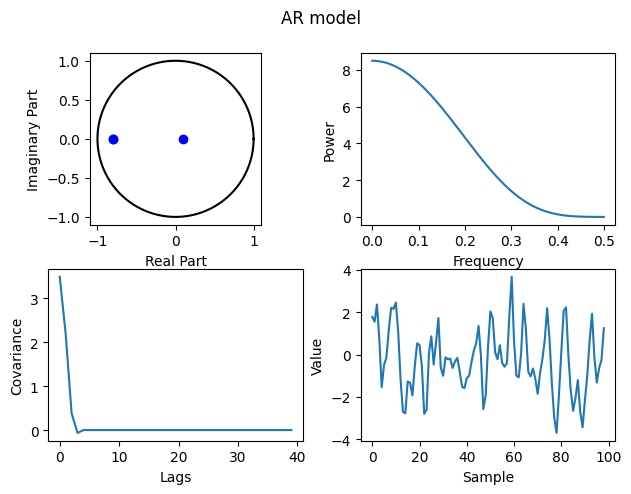

In [10]:
# Define parameter
real_zero = 0.1

# Define multiple zero-pairs and find the corresponding polynomial.
C=np.poly([rhoc*np.exp(1j*2*np.pi*freqc),  rhoc*np.exp(-1j*2*np.pi*freqc), real_zero])
A = [1]
n,p = poles_and_zeros(C,A)

# 4 plots.
# Write your own code below
fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,R)
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power")


r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")


n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")

Study the results.

***Q7. For a general MA(q)-process, for which values of $\tau$ do the
covariance functions of the different processes above become zero? Is
this true for your examples?***

**A7.** Around $\tau$ > 3, i.e the degree of the polynomial.

### 1.4 Example of an ARMA(2,2)-process

We model an ARMA(2,2)-process using both poles and zeros with the code below, using appropriate choices of the damping factors and frequencies.

To be able to see also the location of the zeros in the spectral density it is wise to replace the plotting of the spectral density in your script with a plotting of the spectral density in dB-scale, i.e. `axs[0,1].plot(w/2/np.pi,10*np.log10(R))`. View both the linear and the dB-scale to see the differences.

Text(313.26767676767673, 0.5, 'Value')

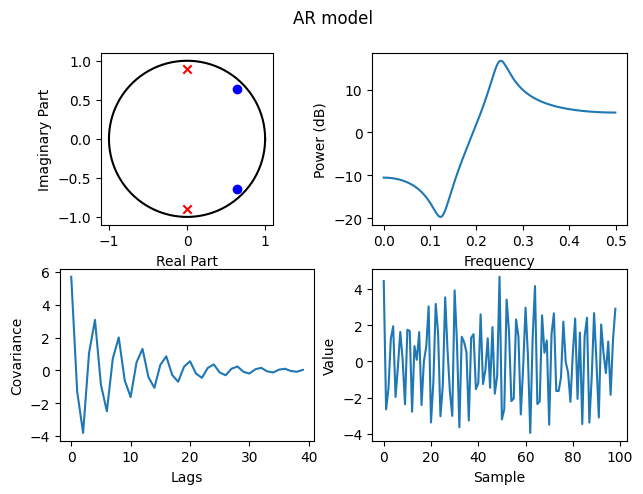

In [11]:
# Define parameters
# Write your own code below

#poles
rhoa = 0.9
freqa = 0.25

#zeros
rhoc = 0.9
freqc = 0.125

# Define poles and zeros, and find the corresponding polynomial
A = np.poly([rhoa*np.exp(1j*2*np.pi*freqa),  rhoa*np.exp(-1j*2*np.pi*freqa)])
C=np.poly([rhoc*np.exp(1j*2*np.pi*freqc),  rhoc*np.exp(-1j*2*np.pi*freqc)])


n,p = poles_and_zeros(C,A)

# 4 plots.
# Write your own code below
fig, axs = plt.subplots(2,2)
fig.suptitle('AR model') # Sets title
plt.tight_layout() # Adjusts grid to make plots always fit.
plot_poles_and_zeros(n,p,axs[0,0])

w,h = scipy.signal.freqz(sigma**2*C,A,worN=1024)
R = np.abs(h)**2
axs[0,1].plot(w/2/np.pi,10*np.log10(R))
axs[0,1].set_xlabel("Frequency")
axs[0,1].set_ylabel("Power (dB)")


r = np.real(ifft(np.concatenate([R,np.flip(R[:-2])])))

# Plotting
axs[1,0].plot(np.arange(0,40),r[0:40])
axs[1,0].set_xlabel("Lags")
axs[1,0].set_ylabel("Covariance")


n=150
e = np.sqrt(sigma**2)*np.random.randn(n,1)
x = scipy.signal.lfilter(C, A, e, axis=0)
xstat=x[51:150]
axs[1,1].plot(xstat)
axs[1,1].set_xlabel("Sample")
axs[1,1].set_ylabel("Value")

***Q8. Which parts of the spectral density have high power and which has
low power respectively in reference to the location of poles and zeros?
What are the advantages and drawbacks of the linear- and dB-scales
respectively?***

**A8.**

- High frequency value for poles contribute to strong peaks in the spectral density graph
- High frequency values for zeros contribute to large dips to the spectral density.
- Without the dB-scale, we only see the peak of the poles.

<br></br>

Save your scripts for visualizing pole-zero plots, spectral densities,
covariance functions and realizations for use in future exercises!

## 2 Speech modeling in mobile phones

The Global System for Mobile Communications (GSM) uses a system based on
Linear Predictive Coding, (LPC) for the coding and decoding of speech in
the transmission. A simplification of the LPC-model can be interpreted
as an AR-model. The AR-parameters of the model are estimated from a time
frame of 20 ms, that is assumed to be stationary, and the parameters of
the AR-model are then sent to the other person's phone together with
residual information between the model and the data. By using the
residual information together with a white noise realization as input of
the AR-model, the speech will be reconstructed to the extent that we can
hear what is said. The gain of this procedure is more efficient use of
the bitrates that is available for the transmission of information.

In this exercise we will code and decode a noisy speech sequence using
estimated AR-parameters and thereby we will have constructed a
simplified version of the LPC-decoder.

### 2.1 Filtering of noisy data

Load the file `speechdata` with the variables `data` and `fs`. Someone
is saying *"Why were you away a year, Roy?"*. The sampling frequency is
48 kHz and the data is heavily disturbed by high-frequency noise. Listen
to the file using `sd.play(x,fs)`. Don't forget to include the sampling
frequency! Also plot the data sequence.


In [12]:
!wget -q https://raw.githubusercontent.com/axellangenskiold/fmsf10/refs/heads/main/speechdata.mat

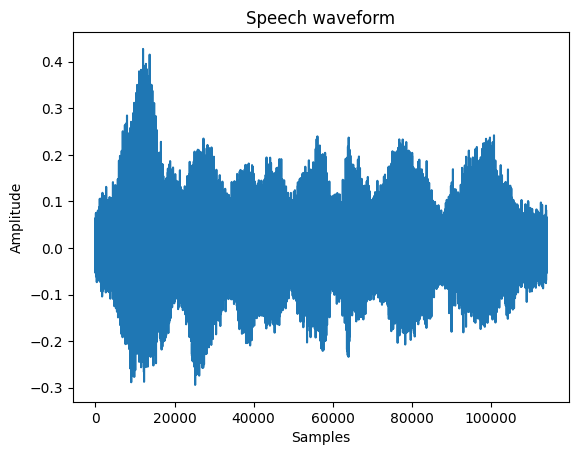

In [13]:
from IPython.display import Audio, display
path_to_data = "speechdata.mat" # Change to YOUR path to data.
mat = sio.loadmat(path_to_data,simplify_cells=True)
data = mat["data"]
fs = mat["fs"]

# Play data
# Write your own code below
display(Audio(data, rate=fs))

# Plot data
# Write your own code below
t = np.arange(len(x))
plt.plot(data)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Speech waveform")
plt.show()
Audio(data, rate=fs)


We will start by using a commonly applied Finite Impulse Response (FIR)
filter to reduce the effect of the noise. Apply an FIR low-pass filter of
order `N=100` with cut-off frequency 4 kHz. Use documentation for `firwin` to find out
how to specify `Wn`.

Verify that you have specified `Wn` as the cut-off frequency 4 kHz by
plotting the magnitude function according as well.

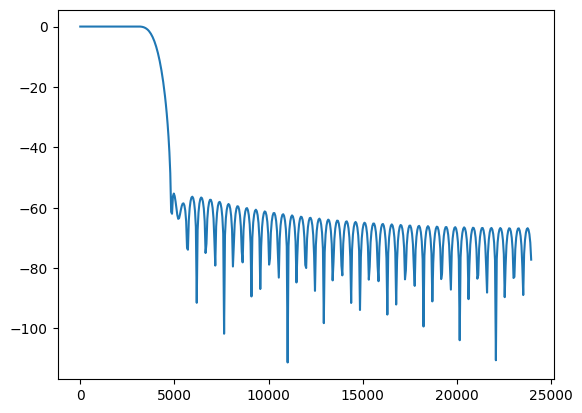

In [14]:
# Define parameters
# Write your own code below
N = 100
cut_off = 4000
Wn = cut_off/(fs/2)

# Define low-pass filter and plot the magnitude function
b=scipy.signal.firwin(N,Wn,pass_zero='lowpass')
w,h = scipy.signal.freqz(b,1)
plt.plot(w/2/np.pi*fs,10*np.log10(abs(h)**2))

You can also replace the magnitude function in last line with the
dB-scaled squared magnitude `10*log10(abs(H)**2)` for a better view.

Filter
your data sequence, using `datafilt=scipy.signal.lfilter(b,1,data)`! Listen and plot the resulting sequence. If you want you can also experiment with some other cut-off frequencies in your filter, e.g. replace 4 kHz with 2 kHz or 8 kHz. Listen to the resulting sound sequences! *Use your choice of low-pass filtered data in the following exercises.*

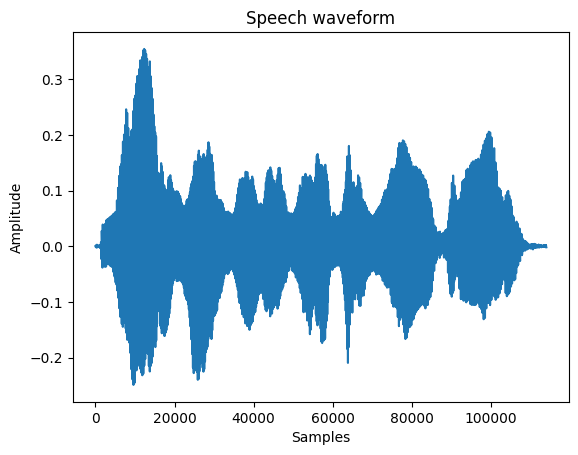

In [15]:
# Write your own code below
N = 100
cut_off = 2500
Wn = cut_off/(fs/2)

# Define low-pass filter and plot the magnitude function
b=scipy.signal.firwin(N,Wn,pass_zero='lowpass')

datafilt = scipy.signal.lfilter(b,1,data)

# Play sound
Audio(datafilt, rate=fs)

# Plot data
# Write your own code below
t = np.arange(len(x))
plt.plot(datafilt)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Speech waveform")
plt.show()

***Q9. For which cut-off frequency is the sound quality best in your
opinion?***

**A9.** 2.5 kHz

### 2.2 Building an AR-model for a short speech sequence

In this exercise we will limit to a sub-sequence of the complete lowpass
filtered data and study how we can choose and estimate an appropriate
AR-model for this sub-sequence of data. Choose a 20 ms sub-sequence
according to `datasub=datafilt[13320:14279]` and plot the sequence.

959


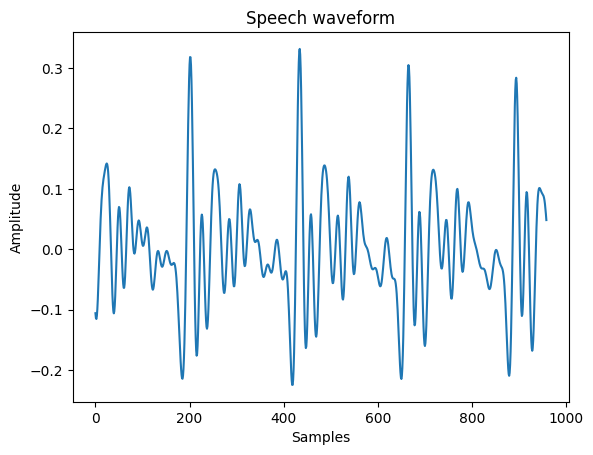

In [16]:
# Write your code below
datasub=datafilt[13320:14279]
datasub_unfiltered=data[13320:14279]

print(len(datasub))

plt.plot(datasub)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Speech waveform")
plt.show()

***Q10. Does the data appears to be stationary? How do you verify that
the sub-sequence is of length 20 ms?***

**A10.**
The data's mean is around zero and appears to be locally stationary.


Length of the sub sequence and divide by the sampling frequency, which is approx. 20ms.

Now you have two choices, either you can code the estimation of the AR-model from the data or if you are inexperienced in programming you can safely rely on the function

    arp, sigma2 = arcov(x,p)

If you will create your own estimator, the writing of the code is a challenging task but it is certainly a very useful exercise! For help see **pages 180-181 in the course book** where the solution is explicitly given in matrix form. You should use the column vector `x` and the model order `p`. The output parameters are a row vector `arp` (of length p+1) and the estimated innovation variance `sigma2`. To verify your code, compare the output parameters with the result from `arcov` for a few choices of `p`. The resulting parameters should be the same.

If your own code is reliable you can use it throughout the remaining part of the exercise. Otherwise you should rely on `arcov`. Test a few different orders to see if you can model the `datasub`-sequence appropriately.

As we don't have any true spectral density to compare with we can only make a comparison with a periodogram estimate. The following code calculates the periodogram and plots in a different view compared to the applied Matlab-function in Computer exercise 1. Here, the resulting spectral estimate is given for all frequencies from zero to `fs`. Most often we visualize the spectral estimate for frequencies `-fs/2` to `fs/2`, but the spectral density is periodic with period `fs` and the periodogram calculation gives the frequency range `-fs/2` to 0 at frequencies `f/2` to `fs`.

    nfft = 1024
    Rx=abs(fft(x,nfft))**2/len(x)  # Periodogram
    plt.plot(w,10*np.log10(Rhat)) # Plotting

We calculate an AR-spectrum `Rxar` from your estimated coefficients `arp` for the same frequency range as the periodogram above, 0 to `fs`.

    w,h = scipy.signal.freqz([1],A,worN=1024,fs=fs,whole=True)
    Rxar = sigma2*abs(h)**2 # AR-spectrum
    plt.plot(w,10*np.log10(Rxar))

Plot the AR-spectrum in the same figure as the periodogram.

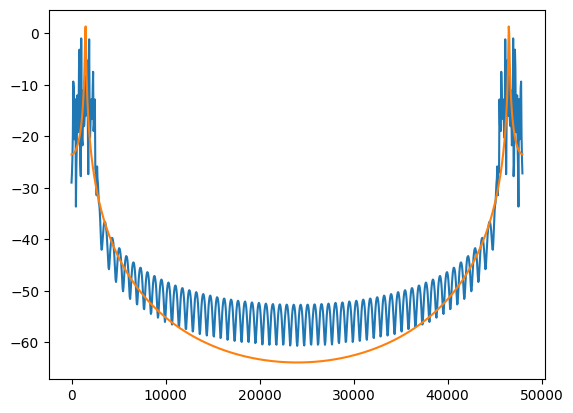

In [17]:
# Write your own code below
p = 2
arp, sigma2 = arcov(datasub,p)

nfft = 1024
Rx=abs(fft(datasub,nfft))**2/len(datasub)  # Periodogram

w,h = scipy.signal.freqz([1],arp,worN=nfft,fs=fs,whole=True) # Use arp and nfft
Rxar = sigma2*abs(h)**2 # AR-spectrum

plt.plot(w,10*np.log10(Rx))
plt.plot(w,10*np.log10(Rxar))

***Q11. Explain what you see in the figure. In what frequency range do
you find the important part of the spectral estimate?***

**A11.**

The blue curve is the periodogram (direct FFT-based estimate)

The orange curve is the AR(2) estimate

We can see that most of the energy is concentrated at low frequencies, witch is not surprising since humans speak at approx that freq.
<br></br>
***Q12. Do you think your AR-model of the filtered speech is able to
catch a spectral peaks of the underlying speech in a reasonable way?
Comment on the different frequency ranges.***

**A12.**

It smoothens the spectrum and follows the broad low-frequency trend, but it can't resolve the any narrow peaks of speech very well.

It's good for low frequencies and not as good for high frequencies.

### 2.3 Decimation of data to find a better AR-model

In the previous section we could see that it was difficult to find a
good model for the filtered speech data. The reason is that the
modelling includes the higher frequencies of the spectrum where there is
no speech-related information. The same problem will appear using the
unfiltered sequence, the AR-model would then have considered also the
high-frequency noise. For the lower frequencies, where the important
speech spectral density structure is located, the modelling become
tricky as the spectrum was very compressed in frequency. We can solve
this problem by decimating the data using


In [18]:
x = scipy.signal.decimate(datasub,6)
fs = fs/6

Test some parameter choices of the AR-model and plot the resulting
AR-model spectrum together with the periodogram. Note that using the
filtered data for decimation is not necessary as `scipy.signal.decimate` applies a
lowpass-filter to the data before the decimation.

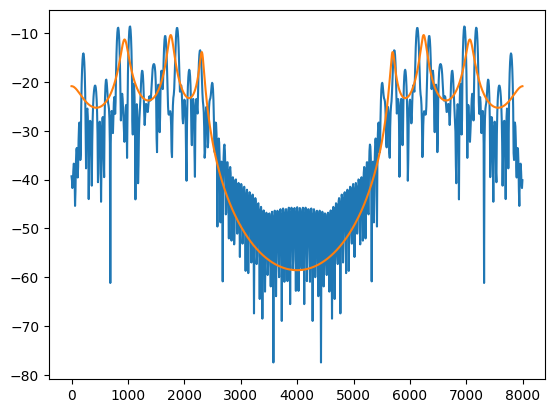

In [38]:
# Repeat AR-estimation process with decimated signals
# Write your own code below
p = 7
arp, sigma2 = arcov(x,p)

nfft = 1024
Rx=abs(fft(x,nfft))**2/len(x)  # Periodogram

w,h = scipy.signal.freqz([1],arp,worN=nfft,fs=fs,whole=True) # Use arp and nfft
Rxar = sigma2*abs(h)**2 # AR-spectrum

plt.plot(w,10*np.log10(Rx))
plt.plot(w,10*np.log10(Rxar))

***Q13. Do you find that your new AR-model of the decimated data mirrors
the properties of the speech in a better way than in the previous
exercise?***

**A13.**
Yes, i would say so.

### 2.4 Evaluating model orders with FPE

To actually find the best AR-model for a specific sequence, the order of
the model should be evaluated for an optimal choice. This is rather
difficult and various formulas have been presented over the years to
assist in this choice. Most of these use the innovation variance and
weights this value in different ways. One commonly used is the Final
Prediction Error (FPE) defined as $FPE=\hat{\sigma}^2\frac{n+p+1}{n-p-1}$, where `n` is the data length.
We apply the FPE to make a model order choice for our sub-sequence.
Therefore we estimate the AR-parameters and more importantly the
innovation variances for a number of possible model orders. We apply
this procedure to the decimated data sequence in a `for`-loop, resulting in a vector `sigma2p` with the innovation variances. The
following code weights the innovation variances for all tested orders to
the FPE and plots the resulting values as a function of different model
orders,



(79,)


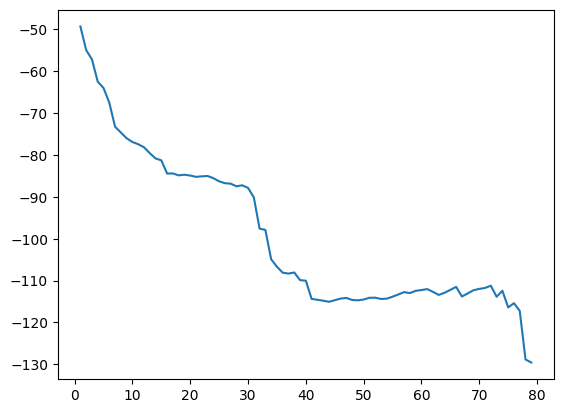

In [34]:
sigma2 = []
for ptest in np.arange(1,80):
    [arp,var] = arcov(x,ptest) # Exchange this to your method if you want
    sigma2.append(var)
sigma2 = np.array(sigma2)
n = len(x)
ptvect = np.arange(1,80)
FPE=sigma2*(n+ptvect+1)/(n-ptvect-1)
print(FPE.shape)
plt.plot(ptvect,10*np.log(FPE))
plt.show()

With increasing model order, the resulting innovation variance. i.e. the
residual error which is not taken care of by the model, will always
decrease. The FPE value includes a weighting that compensates the
advantage of using an increased number of parameters. In reality, there
is always several possible choices of 'elbows' and from this specific
plot we can find e.g. `p=7`, `20` or `36` as typical choices of model
orders.

### 2.5 The complete AR-model and reconstruction of the speech

The file `CompleteAR` runs the AR-estimation using the model order `p`
for all sub-sequences of the decimated data sequence. All AR-parameters
and innovation variances are stored and is then used to reconstruct the
speech as the sequence `datarec` from a Gaussian white noise sequence.
The original data and the reconstructed data will be plotted in the same
figure for comparison. You should run the script for the three orders
above and listen to the resulting reconstructed sound. NOTE: Before
playing the sound, check the figures and make sure the reconstructed
sequence is stable!

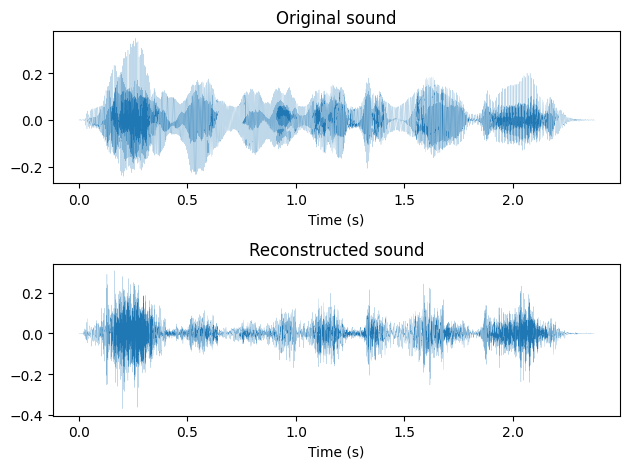

In [45]:
p = 20  # Chosen model order
datarec, fsx = completeAR(datafilt,48000,p) # Estimates seperate AR-models for 20-ms chunks of speech, then reconstructs the speech from filtered white noise

Audio(data, rate=fs*6)
Audio(datarec, rate=fsx)

# Playing
#sd.play(xtotal,fs)
#sd.play(datarec,fsx)

***Q14. Are you satisfied with the reconstruction of the sound? What is
the actual compression, if you divide the number of samples of the
sequence with the number of parameters needed for reconstruction?***

**A14.** No, sounds awful.

N = 114'000

p = 20

N/(p+1) ≈ 5400 => compression rate

This means that the AR representation is 5400 times smaller than the original 114000 sample.